In [3]:
pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 2.4 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.9 MB/s eta 0:00:00

   ---------------------------------------- 0/4 [tqdm]
   ---------- ----------------------------- 1/4 [regex]
   -------------------- ------------------- 2/4 [click]
   -------------------- ------------------- 2/4 [click]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ----------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [8]:
import pandas as pd
import nltk
#nltk.download('all')
from nltk.tokenize import sent_tokenize, word_tokenize
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from sklearn.model_selection import train_test_split
import numpy as np

# Data Processing

In [17]:
# load data
text = ""

with open("01 Harry Potter and the Sorcerers Stone.txt", encoding="utf-8") as file:
    text = file.read()
    file.close()
with open("02 Harry Potter and the Chamber of Secrets.txt", encoding="utf-8") as file:
    text += file.read()
    file.close()
with open("03 Harry Potter and the Prisoner of Azkaban.txt", encoding="utf-8") as file:
    text += file.read()
    file.close()
with open("04 Harry Potter and the Goblet of Fire.txt", encoding="utf-8") as file:
    text += file.read()
    file.close()
with open("05 Harry Potter and the Order of the Phoenix.txt", encoding="utf-8") as file:
    text += file.read()
    file.close()
with open("06 Harry Potter and the Half-Blood Prince.txt", encoding="utf-8") as file:
    text += file.read()
    file.close()
with open("07 Harry Potter and the Deathly Hallows.txt", encoding="utf-8") as file:
    text += file.read()
    file.close()
with open("percy_jackson_book_1.txt", encoding="utf-8") as file:
    text += file.read()
    file.close()
with open("percy_jackson_book_2.txt", encoding="utf-8") as file:
    text += file.read()
    file.close()
with open("percy_jackson_book_3.txt", encoding="utf-8") as file:
    text += file.read()
    file.close()
with open("percy_jackson_book_4.txt", encoding="utf-8") as file:
    text += file.read()
    file.close()
with open("percy_jackson_book_5.txt", encoding="utf-8") as file:
    text += file.read()
    file.close()

text = text.lower()
sentences = sent_tokenize(text)
print("Number of Sentences for training: ", len(sentences))

Number of Sentences for training:  106896


# Tokenization and Input Output Mapping

In [19]:
# numerical symbols
count = 0
mapping = {}
for sentence in sentences:
    words = word_tokenize(sentence)
    for word in words:
        if word not in list(mapping.keys()):
            mapping[word] = count
            count += 1



In [20]:
print("Number of Words for training: ", len(list(mapping.keys())))

Number of Words for training:  43975


In [23]:
# sliding window, input and labels
n = 7
X = []
Y = []

for sentence in sentences:

    words = word_tokenize(sentence)
    
    count = 0

    while n+count < len(words):
        input = []
        for word in range(count, n+count):
            num = mapping[words[word]]
            input.append(num)
        X.append(input)
        Y.append(mapping[words[n+count]])
        count+=1


# Data split

In [25]:
# split data into training and testing sets
print("Total Input Data: ", len(X))
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2)
X_Train = np.array(X_Train)
X_Test = np.array(X_Test)
Y_Train = np.array(Y_Train)
Y_Test = np.array(Y_Test)

"""input = np.concatenate([np.array(X_Train).flatten(), np.array(Y_Train)])
input = np.unique(input)"""
input_dim = np.max(X_Train)+1
print(input_dim)
print(len(X_Train), len(X_Test))

Total Input Data:  1491995
43975
1193596 298399


# Model Load and Train

In [29]:
epochs = 12
batch_size = 64
lstm_layers = 1
lstm_units = 128

In [27]:
# load model and define architecture
model = Sequential([
    Embedding(input_dim = input_dim, output_dim = 64),
    LSTM(128),
    Dense(units = input_dim, activation = 'softmax')
])

In [28]:
# compile model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [30]:
# feed data to model - training and validation
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_Train, Y_Train, epochs = 12, validation_split = 0.2, callbacks = [early_stop], batch_size=64)

Epoch 1/12
14920/14920 ━━━━━━━━━━━━━━━━━━━━ 1446s 97ms/step - accuracy: 0.1209 - loss: 6.1672 - val_accuracy: 0.1943 - val_loss: 5.1557
Epoch 2/12
14920/14920 ━━━━━━━━━━━━━━━━━━━━ 1853s 123ms/step - accuracy: 0.2033 - loss: 4.9469 - val_accuracy: 0.2107 - val_loss: 4.9689
Epoch 3/12
14920/14920 ━━━━━━━━━━━━━━━━━━━━ 1910s 128ms/step - accuracy: 0.2246 - loss: 4.6752 - val_accuracy: 0.2182 - val_loss: 4.9252
Epoch 4/12
14920/14920 ━━━━━━━━━━━━━━━━━━━━ 1888s 124ms/step - accuracy: 0.2403 - loss: 4.5231 - val_accuracy: 0.2198 - val_loss: 4.9105
Epoch 5/12
14920/14920 ━━━━━━━━━━━━━━━━━━━━ 1818s 122ms/step - accuracy: 0.2517 - loss: 4.3944 - val_accuracy: 0.2220 - val_loss: 4.9182
Epoch 6/12
14920/14920 ━━━━━━━━━━━━━━━━━━━━ 1848s 124ms/step - accuracy: 0.2623 - loss: 4.2946 - val_accuracy: 0.2224 - val_loss: 4.9346
Epoch 7/12
14920/14920 ━━━━━━━━━━━━━━━━━━━━ 1857s 124ms/step - accuracy: 0.2708 - loss: 4.2142 - val_accuracy: 0.2210 - val_loss: 4.9550


# Model Testing

In [32]:
# accuracy check
test_loss, test_accuracy = model.evaluate(X_Test, Y_Test)
print(test_accuracy)

9325/9325 ━━━━━━━━━━━━━━━━━━━━ 255s 27ms/step - accuracy: 0.2239 - loss: 4.9437
0.222866028547287


# Comparing Accuracies

In [35]:
# Uncomment when have to create new model comparision file

"""import pandas as pd
df = pd.DataFrame({
    'window size': []
    'batch_size': [],
    'epochs': [],
    'LSTM Layers': [],
    'LSTM Units': [],
    'Training Accuracy': [],
    'Validation Accuracy': [],
    'Testing Accuracy': []
})
df.to_csv('Model_Comparisions.csv', index = 'False')"""

In [40]:
new_data = pd.DataFrame([{
    'window_size': n
    'batch_size': batch_size,
    'epochs': epochs,
    'LSTM Layers': lstm_layers,
    'LSTM Units': lstm_units,
    'Training Accuracy': history.history['accuracy'],
    'Validation Accuracy': history.history['val_accuracy'],
    'Testing Accuracy': test_accuracy}])

In [41]:
# save comparisions
df = pd.read_csv("C:\\Users\\Hp\\Documents\\Javeria\\Studies\\Generative_AI_Project\\Model_Comparisions.csv")
df = pd.concat([df, new_data], ignore_index=True)
df.to_csv('Model_Comparisions.csv', index = 'False')

C:\Users\Hp\AppData\Local\Temp\ipykernel_8048\828131796.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_data], ignore_index=True)


# Plots

In [43]:
import matplotlib.pyplot as plt

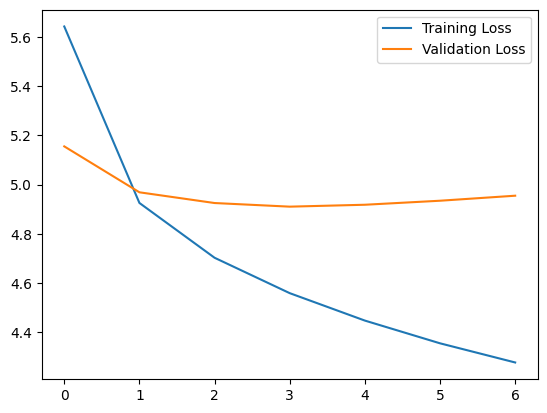

In [44]:
# graphs
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()

In [45]:
# save model
model.save('model2.keras')